In [9]:
import pandas as pd
survival_df = pd.read_csv("../Patient-Survival-Model/Resources/Patient survival dataset.csv")

In [10]:
survival_df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [11]:
survival_df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [12]:
survival_df = survival_df.drop(['Unnamed: 83', 'hospital_id', 'encounter_id', 'patient_id', 'icu_id'], axis = 1)

In [13]:
survival_df.isnull().sum()

age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 80, dtype: int64

In [14]:
survival_df = survival_df.dropna()

In [15]:
survival_df.isnull().sum()

age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 80, dtype: int64

In [16]:
survival_df.shape

(56935, 80)

In [17]:
survival_df

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
5,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
10,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,admit,Med-Surg ICU,0.004861,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
17,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,admit,CTICU,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,47.0,51.439842,1,Caucasian,M,195.0,Operating Room / Recovery,admit,Med-Surg ICU,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0
91706,54.0,19.770448,0,Native American,M,177.8,Accident & Emergency,admit,Med-Surg ICU,0.025694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
91708,75.0,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0


In [18]:
survival_df.to_csv("Resources/cleaned_data_survival_prediction.csv", index=False, encoding="ISO-8859-1")

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [22]:
X = pd.get_dummies(X)

In [25]:
#Balance Data - oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [26]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=45)

clf = ExtraTreesClassifier(random_state=45, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9952732303435554


In [27]:
feature_importances = clf.feature_importances_

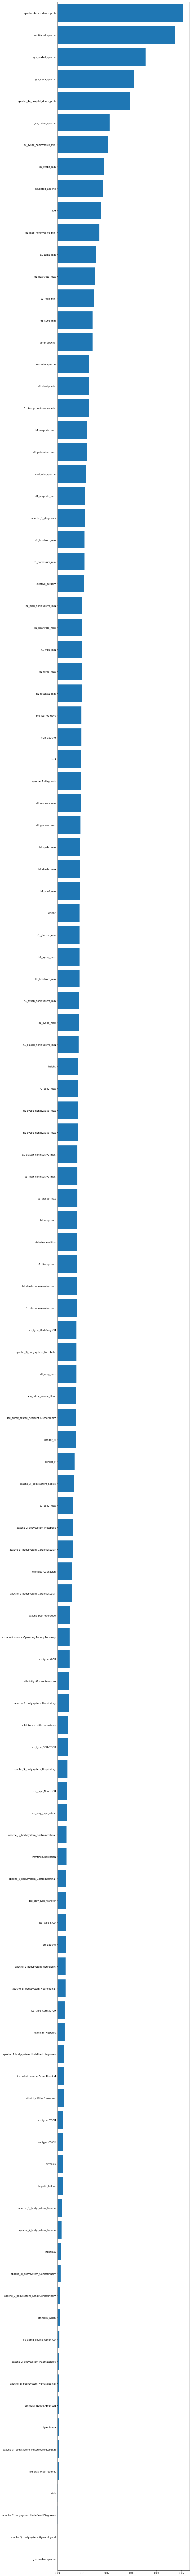

In [28]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()